In [72]:
import numpy as np
import pandas as pd

In [73]:
df=pd.read_excel('car_data1.xlsx')

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1728 entries, 0 to 1727
Data columns (total 7 columns):
buying      1728 non-null object
maint       1728 non-null object
doors       1728 non-null object
persons     1728 non-null object
lug_boot    1728 non-null object
safety      1728 non-null object
class       1728 non-null object
dtypes: object(7)
memory usage: 108.0+ KB


In [75]:
df.describe()

,buying,maint,doors,persons,lug_boot,safety,class
count,1728,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3,4
top,vhigh,vhigh,3,more,med,med,unacc
freq,432,432,432,576,576,576,1210


In [76]:
df.columns

Index(['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class'], dtype='object')

In [77]:
for i in df.columns:
    print("The Unique value in",i, df[i].unique())
   

The Unique value in buying ['vhigh' 'high' 'med' 'low']
The Unique value in maint ['vhigh' 'high' 'med' 'low']
The Unique value in doors ['2' '3' '4' '5more']
The Unique value in persons ['2' '4' 'more']
The Unique value in lug_boot ['small' 'med' 'big']
The Unique value in safety ['low' 'med' 'high']
The Unique value in class ['unacc' 'acc' 'vgood' 'good']


In [78]:
for i in df.columns:
    print(df[i].value_counts())

vhigh    432
med      432
low      432
high     432
Name: buying, dtype: int64
vhigh    432
med      432
low      432
high     432
Name: maint, dtype: int64
3        432
2        432
5more    432
4        432
Name: doors, dtype: int64
more    576
2       576
4       576
Name: persons, dtype: int64
med      576
small    576
big      576
Name: lug_boot, dtype: int64
med     576
low     576
high    576
Name: safety, dtype: int64
unacc    1210
acc       384
good       69
vgood      65
Name: class, dtype: int64


In [79]:
#Importing Seaborn
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

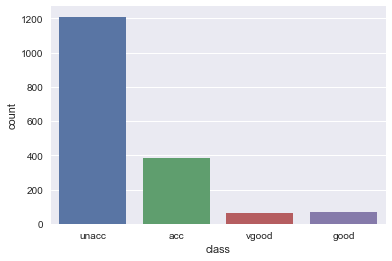

In [80]:
sns.countplot(df['class'])

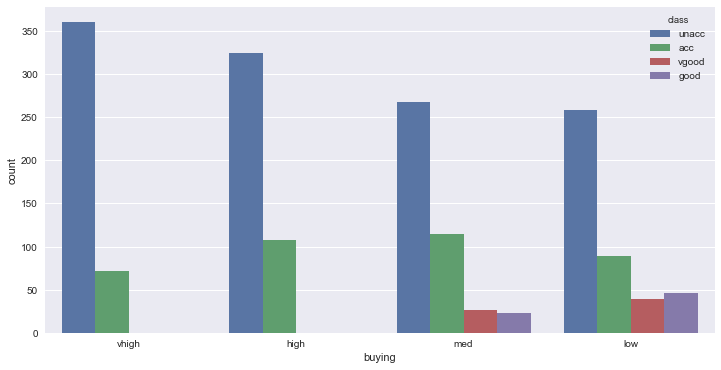

In [81]:
#Plot inside a plot
plt.figure(figsize=(12,6))
sns.countplot(df['buying'],hue=df['class'])

In [52]:
from sklearn.preprocessing import LabelEncoder

In [53]:
le=LabelEncoder()

In [54]:
for i in df.columns:
    df[i]=le.fit_transform(df[i])

In [55]:
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,3,3,0,0,2,1,2
1,3,3,0,0,2,2,2
2,3,3,0,0,2,0,2
3,3,3,0,0,1,1,2
4,3,3,0,0,1,2,2


In [56]:
for i in df.columns:
    print("The Unique value in",i, df[i].unique())

The Unique value in buying [3 0 2 1]
The Unique value in maint [3 0 2 1]
The Unique value in doors [0 1 2 3]
The Unique value in persons [0 1 2]
The Unique value in lug_boot [2 1 0]
The Unique value in safety [1 2 0]
The Unique value in class [2 0 3 1]


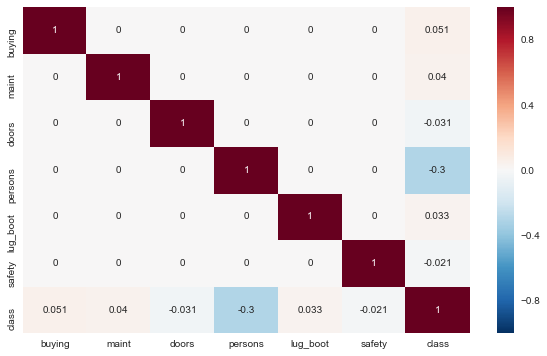

In [58]:
#Checking Correlation
fig=plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True)

In [70]:
#Acquiring Data and Target
X=df[df.columns[:-1]]
y=df['class']


In [71]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=69)

### The Beginning of Machine Learning Library Import

In [85]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report

In [87]:
logreg=LogisticRegression()
logreg.fit(X_train,y_train)
pred=logreg.predict(X_test)
logreg.score(X_test,y_test)

0.697495183044316